# Classification Model

### Problem Statement

Train a Classification model in which: the independent variables
(inputs) are “ASR_Error,” “IntentError,” “Duration,” and “Gender,”; the dependent
variable (output) is “Purchase.” Use the evaluation metrics we introduced in class to
compare the performance of the following four machine learning classification
algorithms: (1) Logistic Regression, (2) SVM, (3) Naive Bayes, and (4) Random
Forest.

In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data.csv')
df.isna().sum()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Data for Classification

In [13]:
y = df['Purchase'].to_numpy()
X = df.drop('Purchase', axis = 1).to_numpy()
#The result should be an array of integers

# Data Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

# Imports

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report



lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# Training

In [16]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Testing

In [17]:

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

              preci

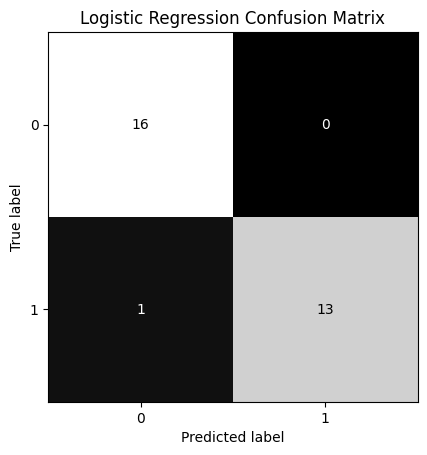

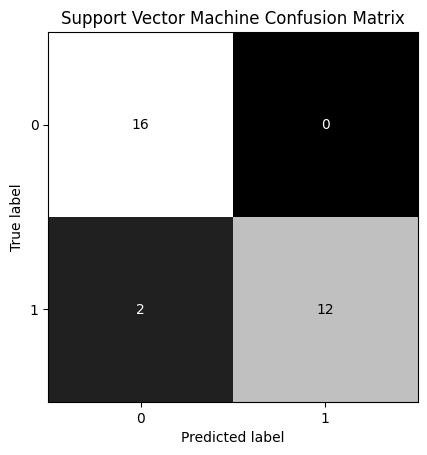

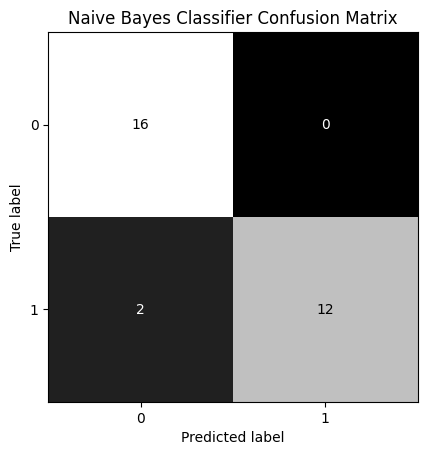

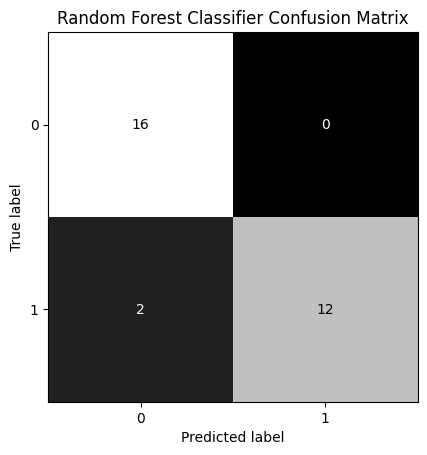

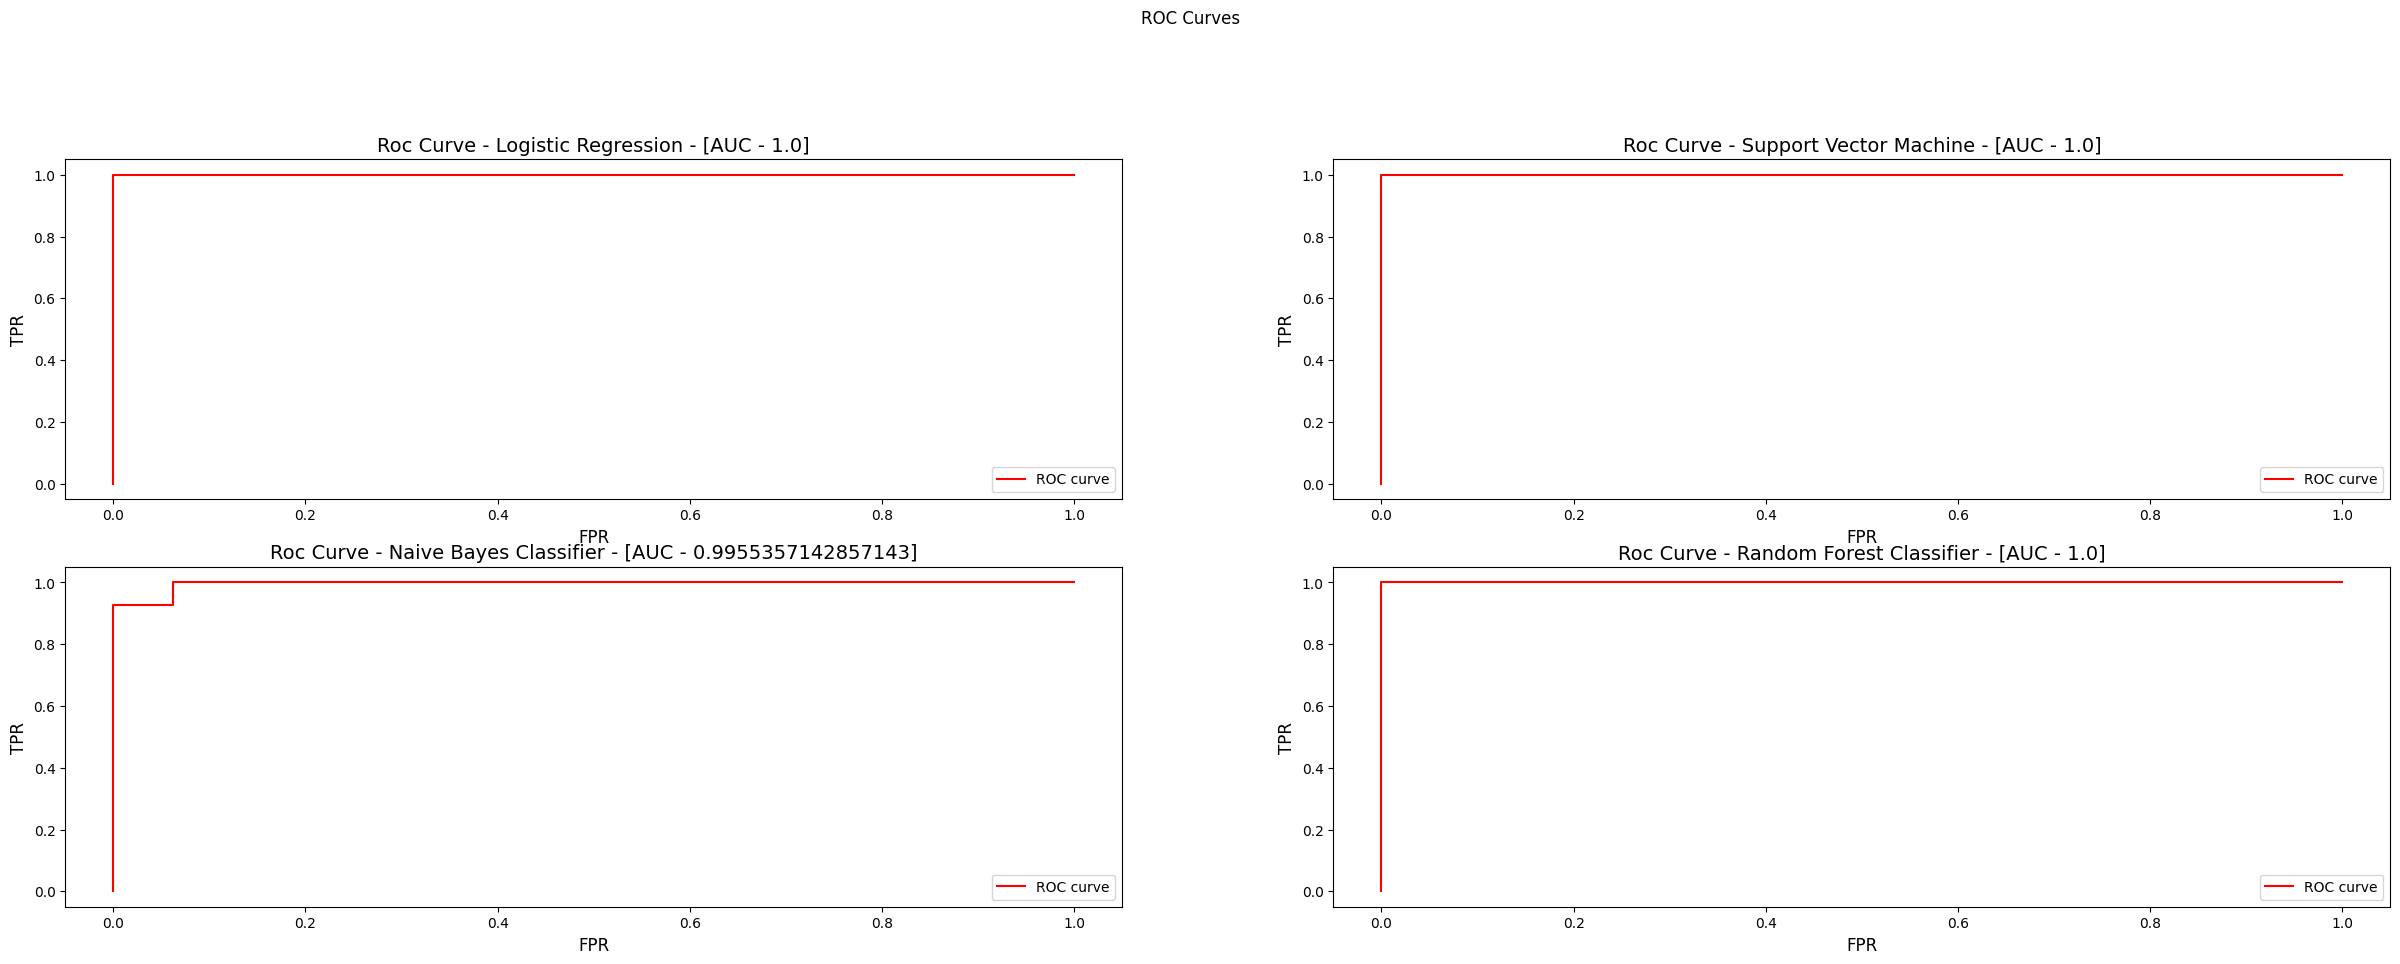

In [18]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()